In [37]:
!pip install git+https://github.com/samoturk/mol2vec

  Cloning https://github.com/samoturk/mol2vec to c:\users\nikhi\appdata\local\temp\pip-req-build-07x_tnc6


  Running command git clone -q https://github.com/samoturk/mol2vec 'C:\Users\nikhi\AppData\Local\Temp\pip-req-build-07x_tnc6'


In [38]:
import pandas as pd
import numpy as np
from rdkit.Chem import Draw
import random
from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from autoviz.AutoViz_Class import AutoViz_Class
from pandas_profiling import ProfileReport
import sweetviz as sv
pd.set_option('display.max_columns', None)
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [39]:
data=pd.read_csv('E:\Downlaods-2\qm9.csv')

In [40]:
data

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,gdb_133881,C1C2C3C4C5OC14C5N23,3.59483,2.198990,1.904230,1.6637,69.37,-0.2254,0.0588,0.2842,760.7472,0.127406,-400.633868,-400.628599,-400.627654,-400.663098,23.658,-1603.983913,-1614.898804,-1623.788097,-1492.819438
133881,gdb_133882,C1N2C3C2C2C4OC12C34,3.65648,2.142370,1.904390,1.2976,69.52,-0.2393,0.0608,0.3002,762.6354,0.127495,-400.629713,-400.624444,-400.623500,-400.658942,23.697,-1601.376613,-1612.291504,-1621.181424,-1490.211511
133882,gdb_133883,C1N2C3C4C5C2C13CN45,3.67118,2.143140,1.895010,1.2480,73.60,-0.2233,0.0720,0.2953,780.3553,0.140458,-380.753918,-380.748619,-380.747675,-380.783148,23.972,-1667.045429,-1678.830048,-1688.312964,-1549.143391
133883,gdb_133884,C1N2C3C4C5CC13C2C45,3.52845,2.151310,1.865820,1.9576,77.40,-0.2122,0.0881,0.3003,803.1904,0.152222,-364.720374,-364.714974,-364.714030,-364.749650,24.796,-1794.600439,-1807.210860,-1817.286772,-1670.349892


Visualising the molecules in our dataset

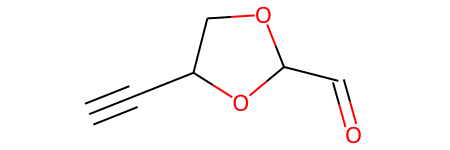

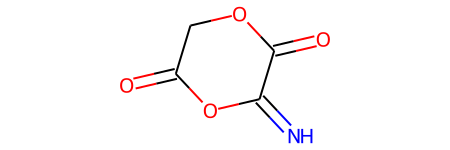

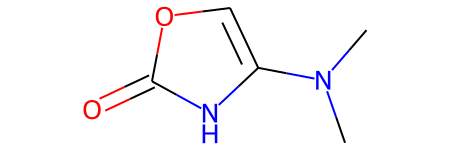

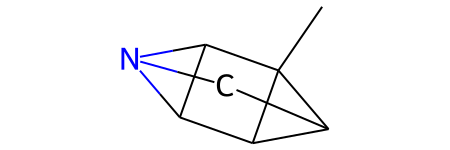

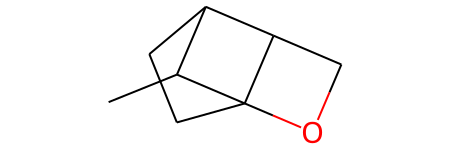

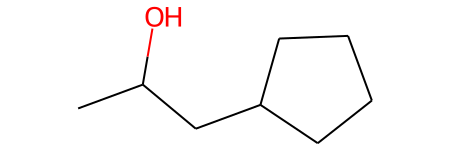

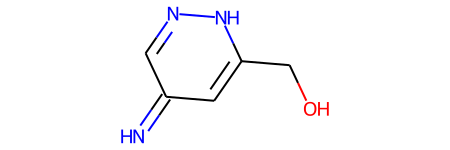

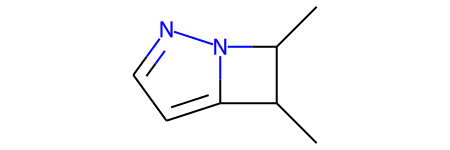

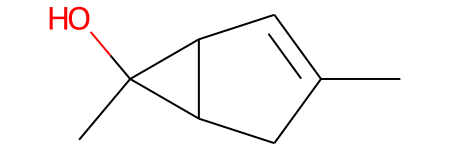

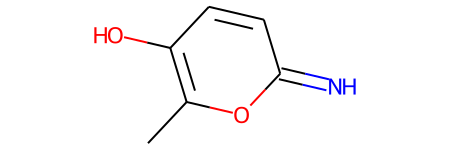

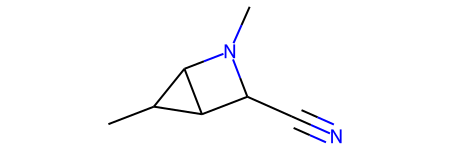

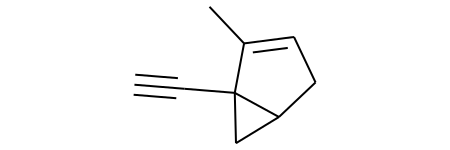

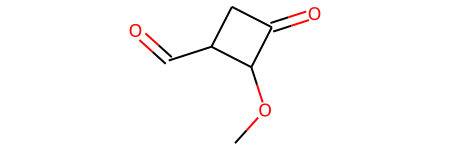

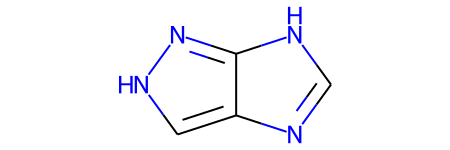

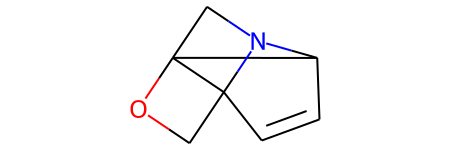

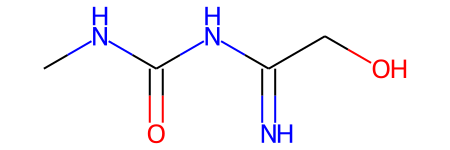

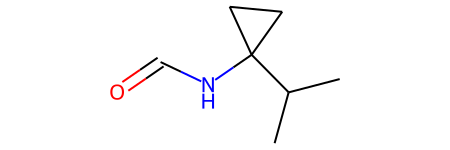

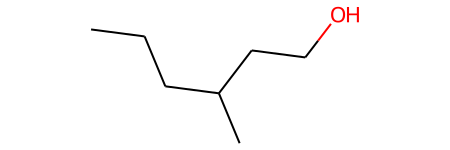

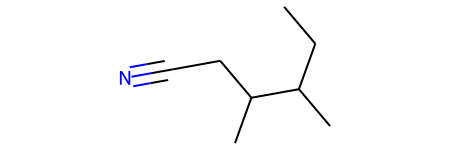

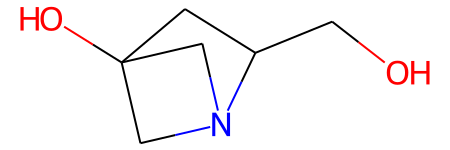

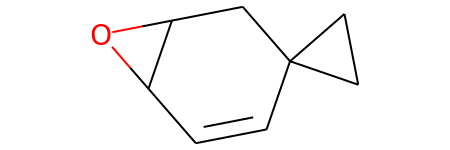

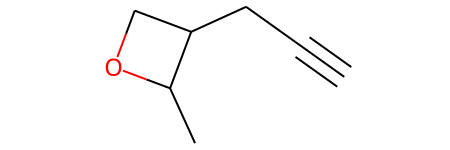

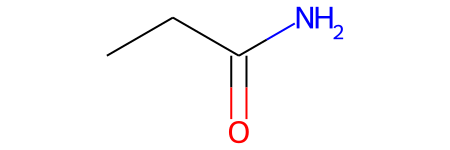

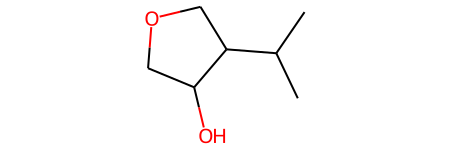

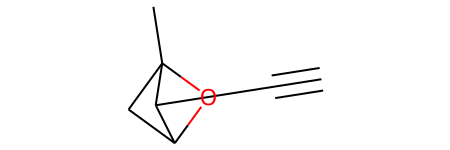

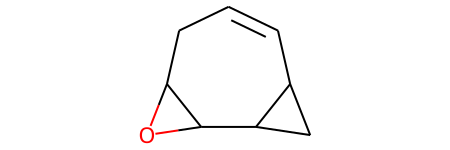

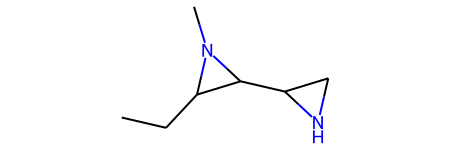

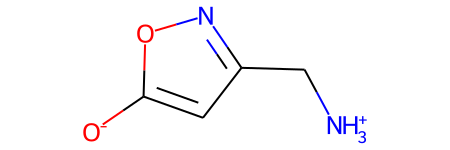

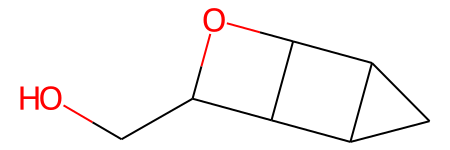

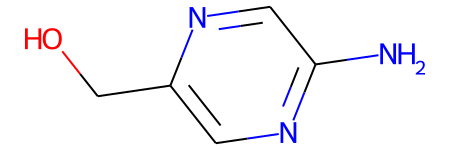

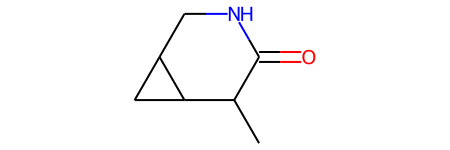

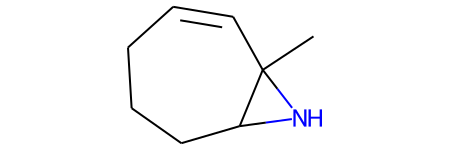

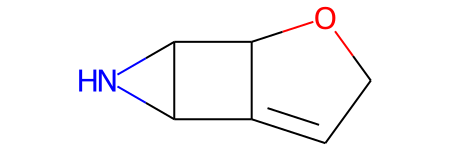

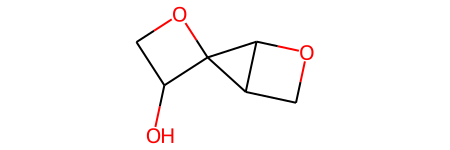

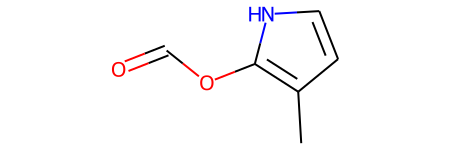

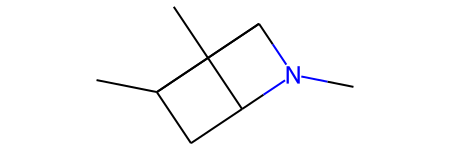

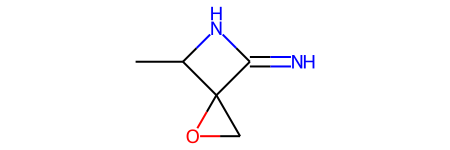

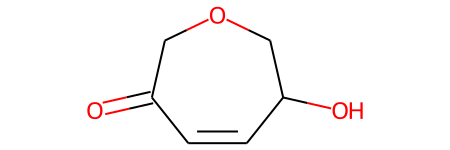

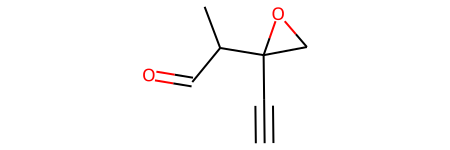

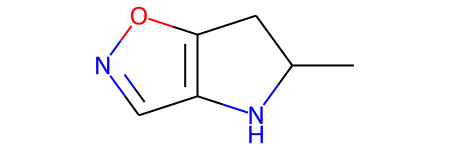

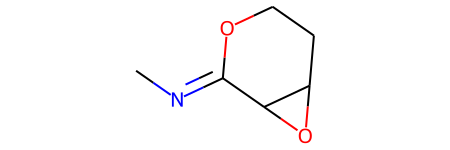

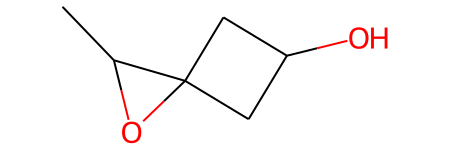

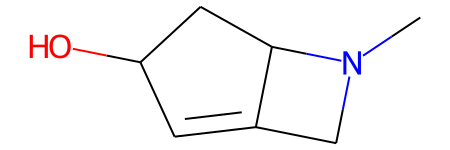

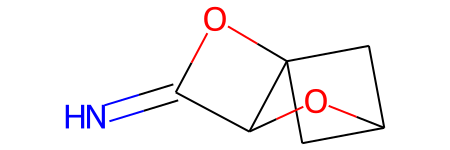

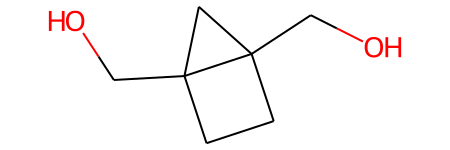

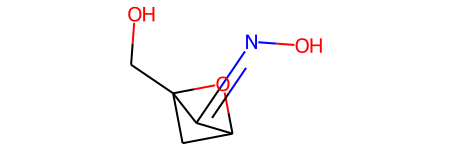

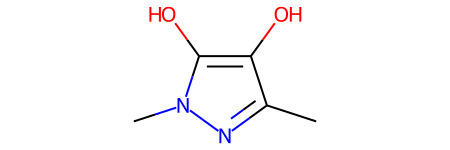

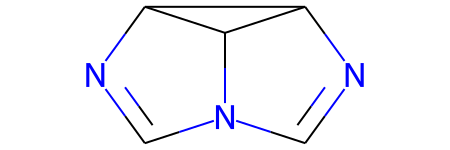

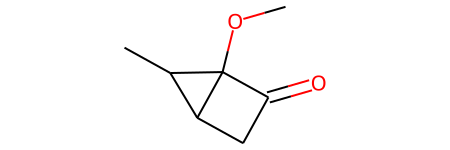

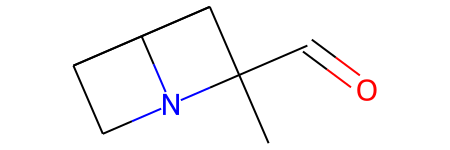

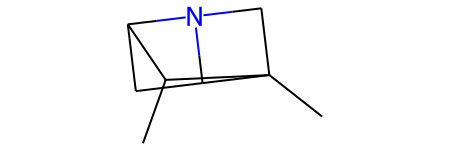

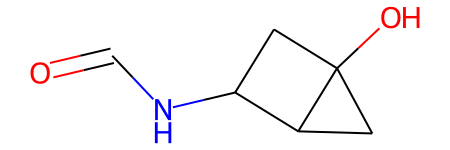

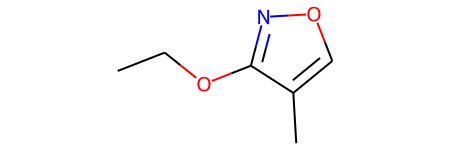

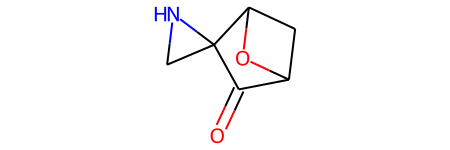

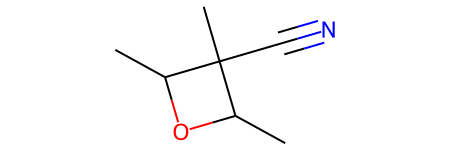

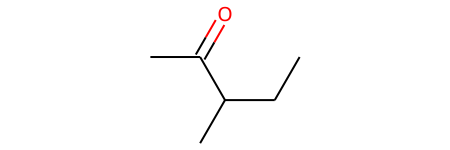

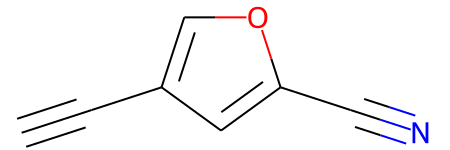

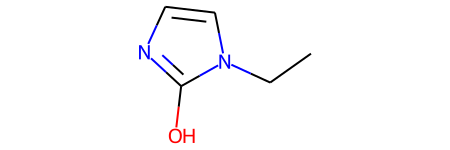

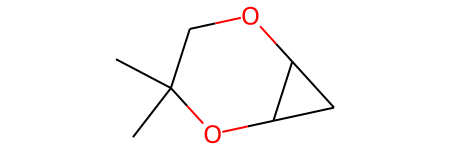

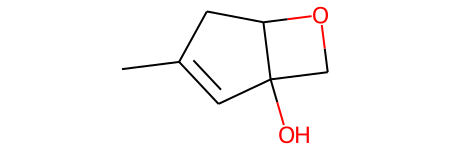

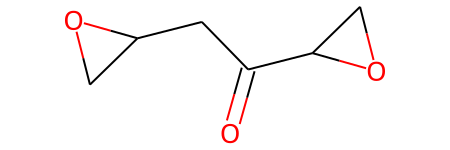

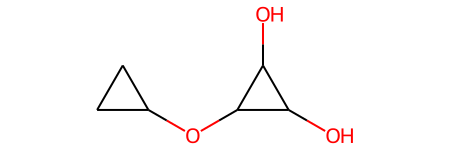

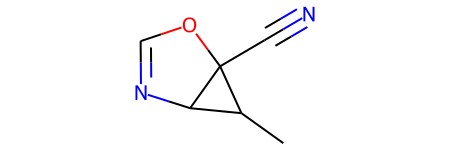

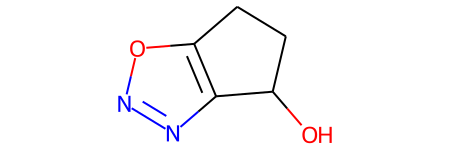

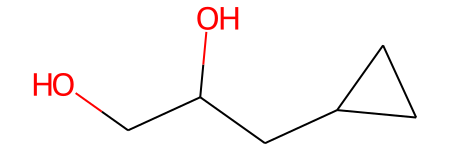

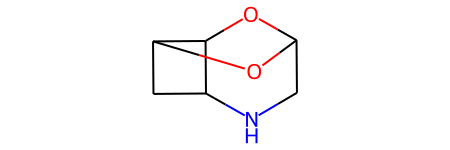

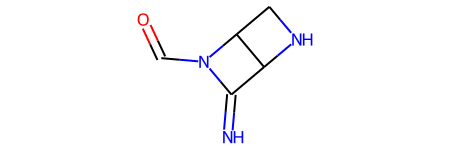

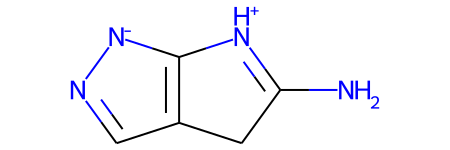

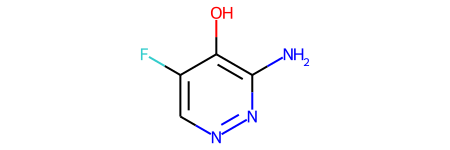

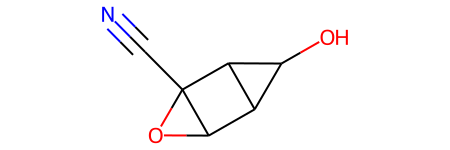

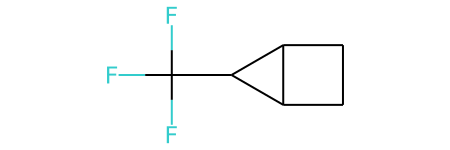

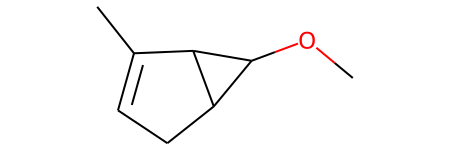

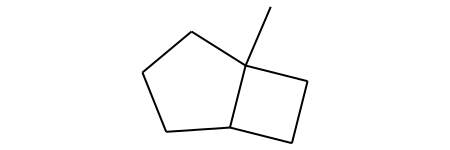

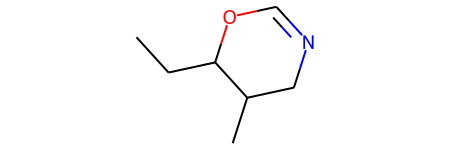

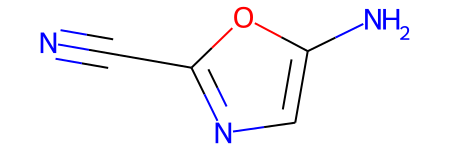

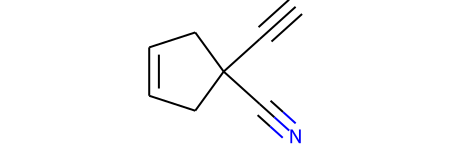

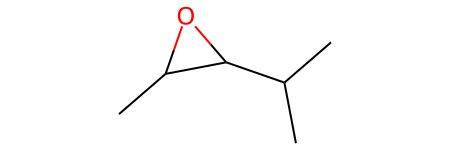

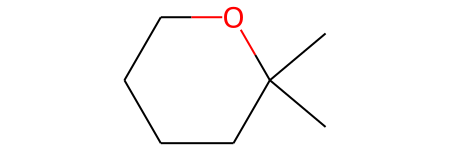

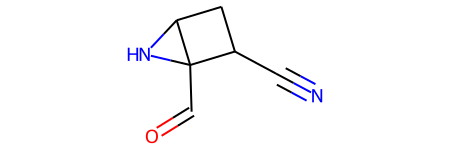

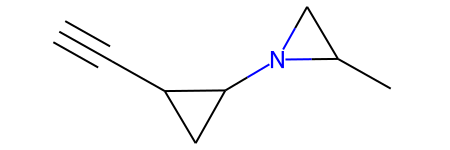

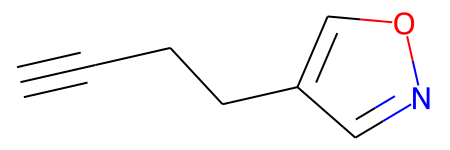

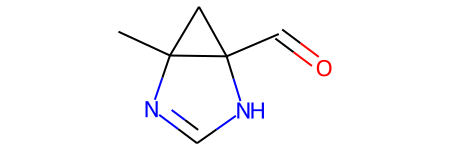

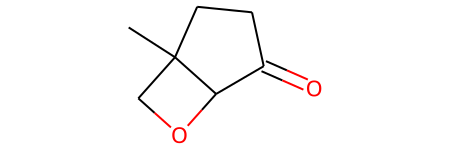

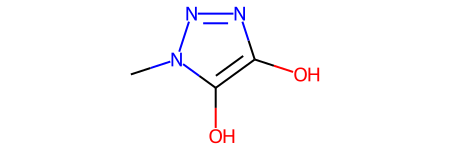

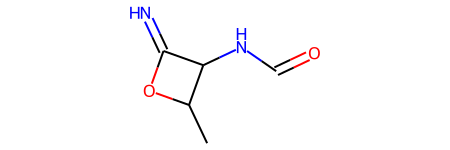

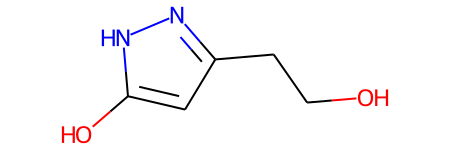

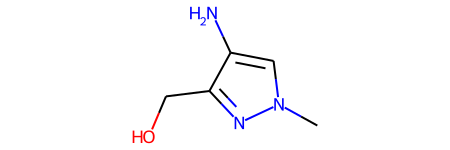

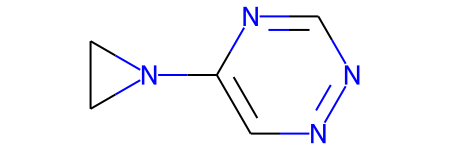

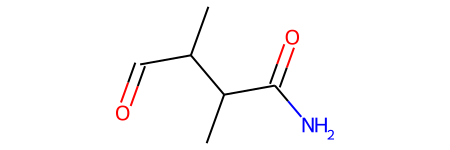

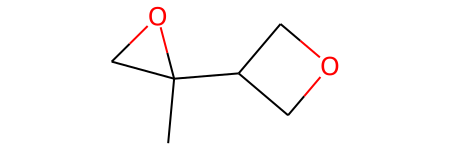

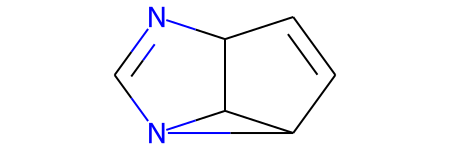

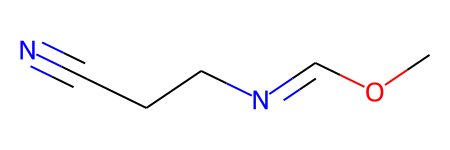

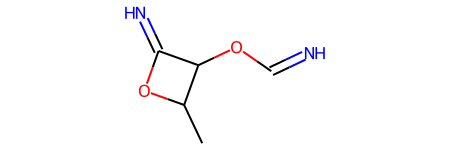

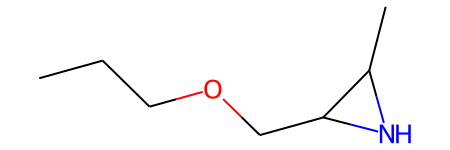

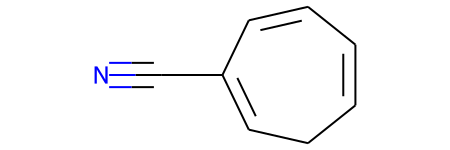

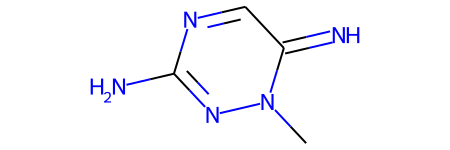

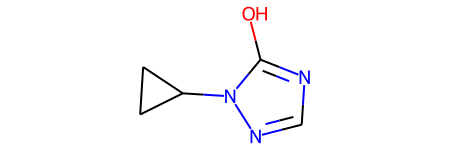

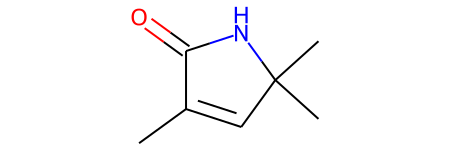

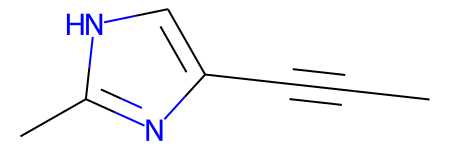

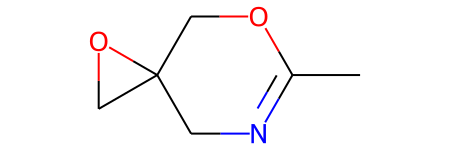

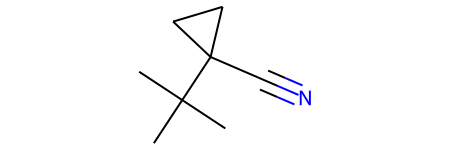

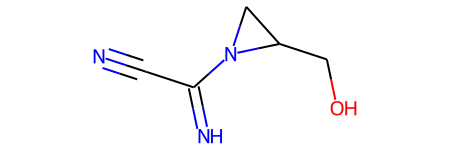

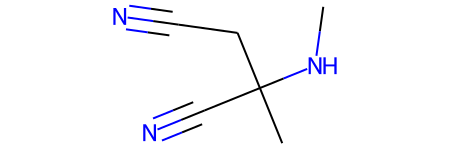

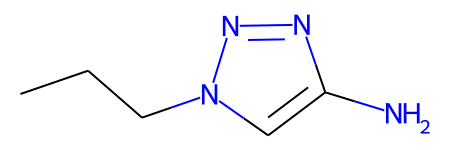

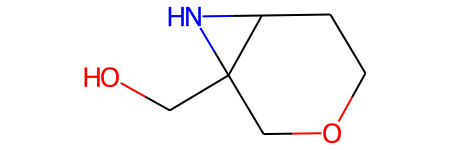

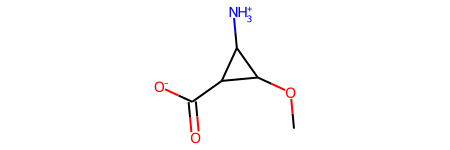

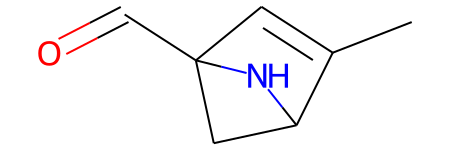

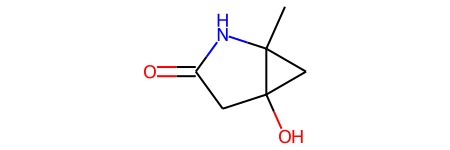

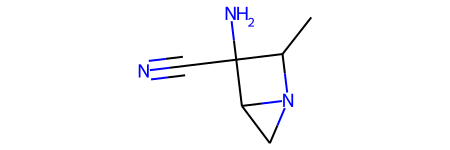

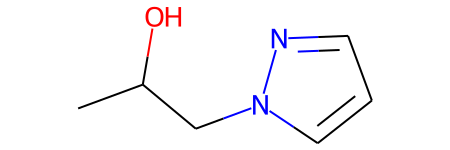

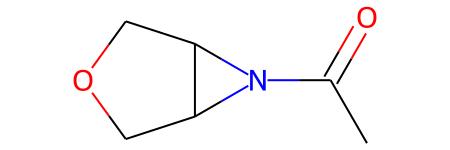

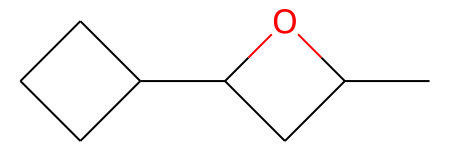

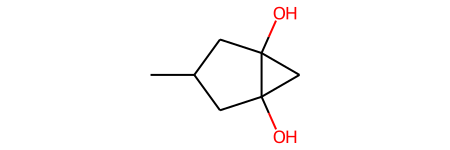

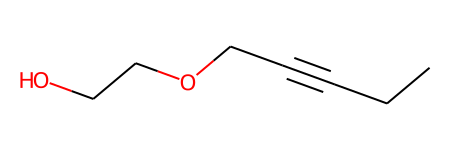

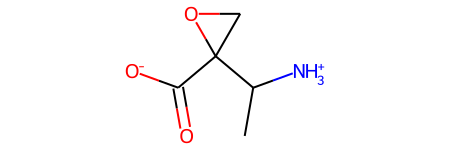

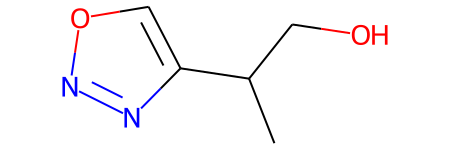

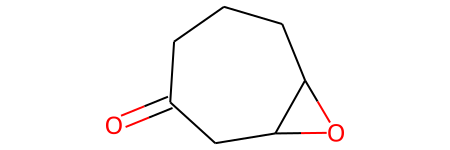

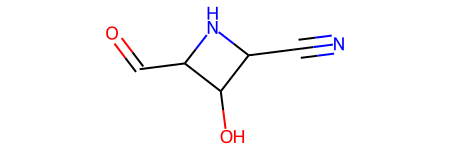

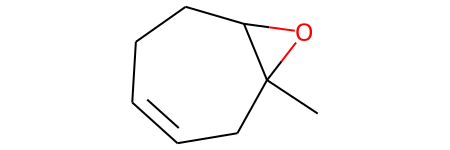

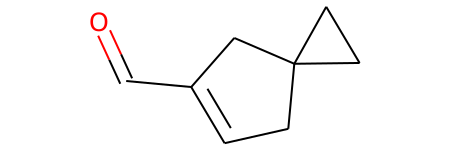

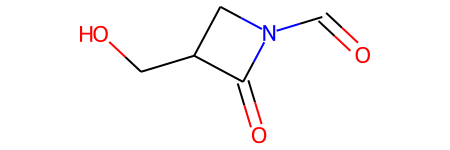

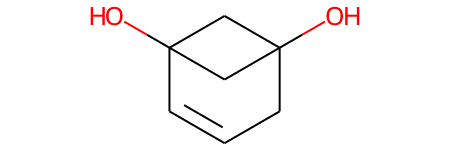

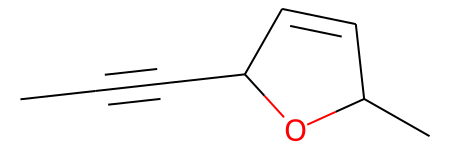

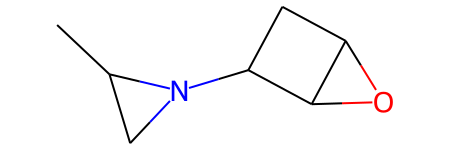

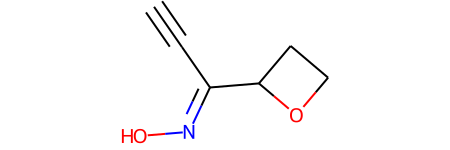

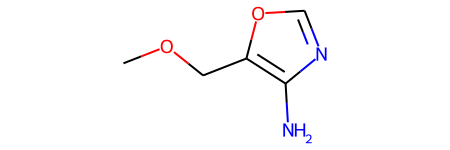

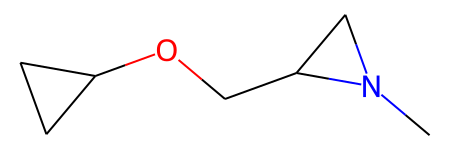

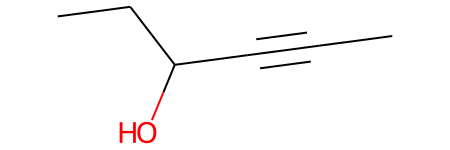

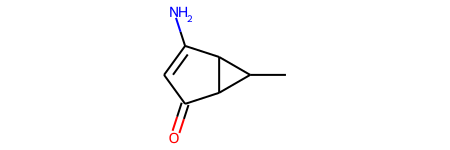

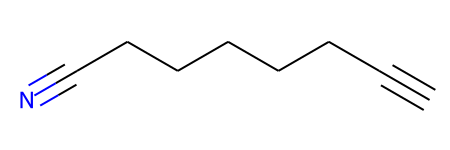

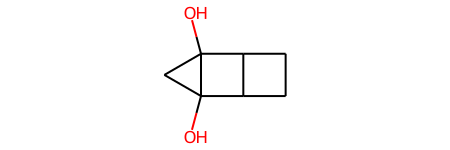

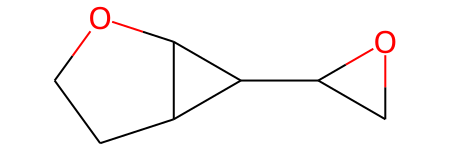

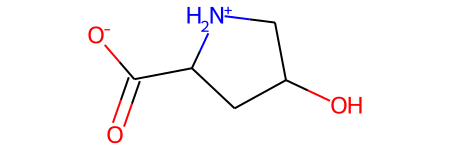

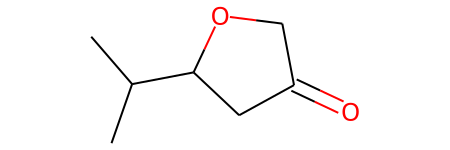

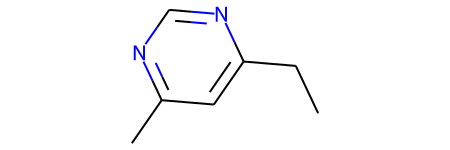

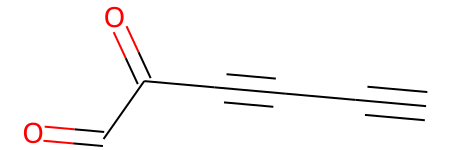

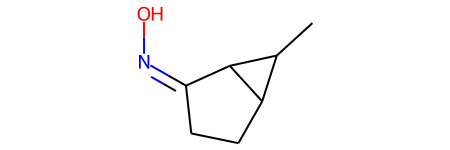

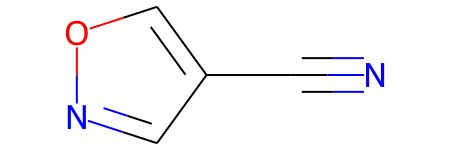

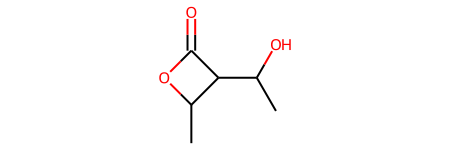

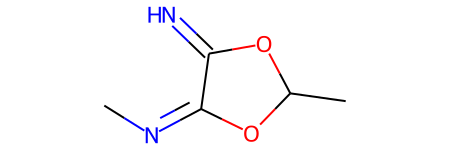

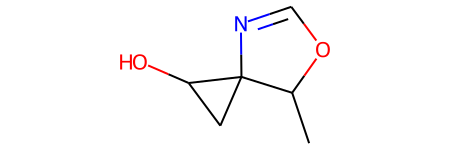

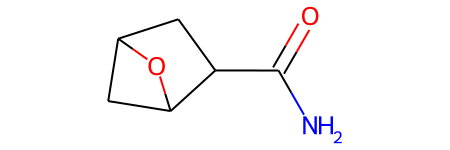

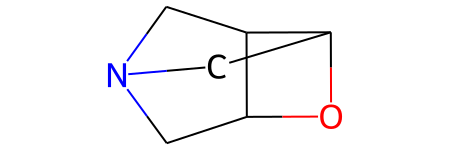

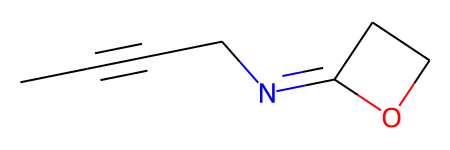

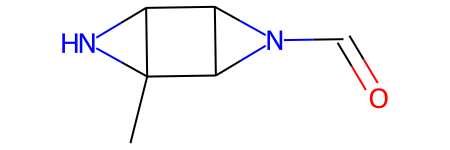

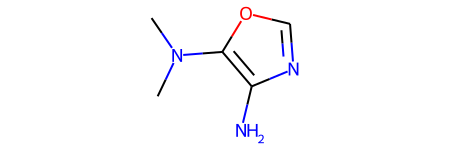

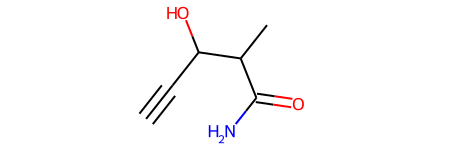

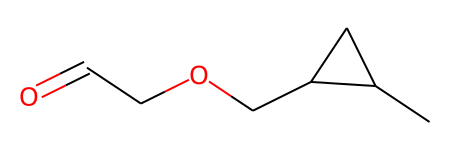

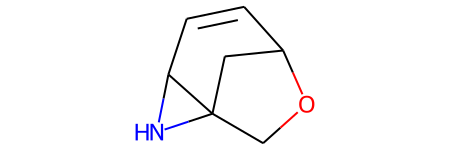

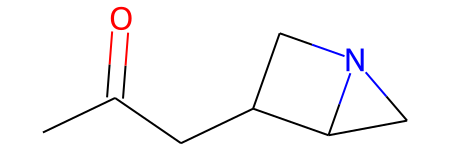

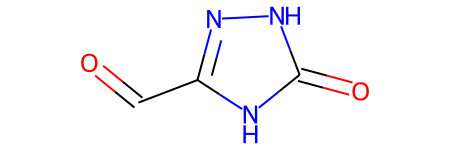

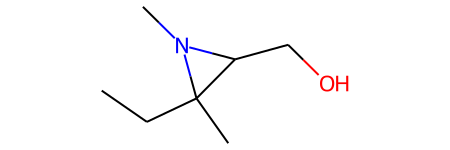

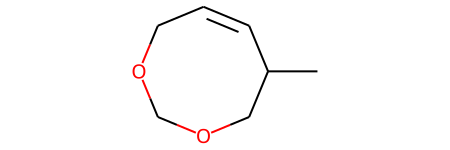

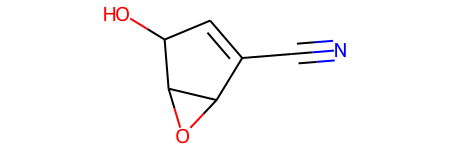

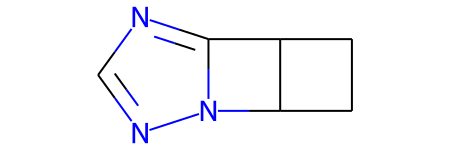

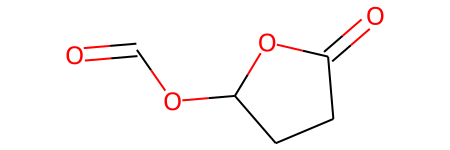

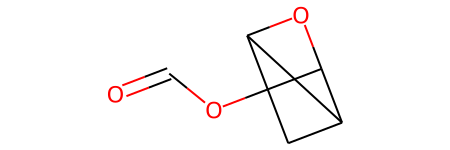

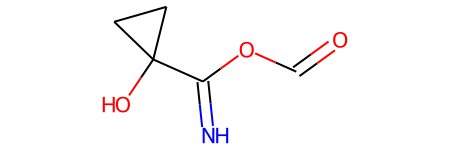

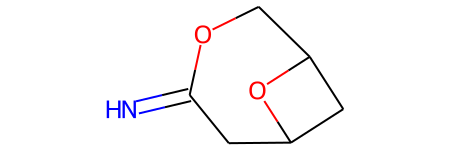

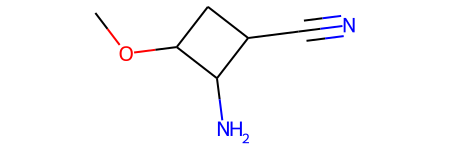

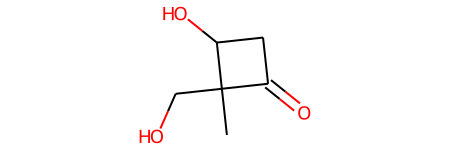

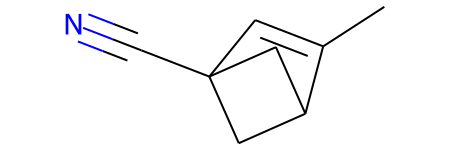

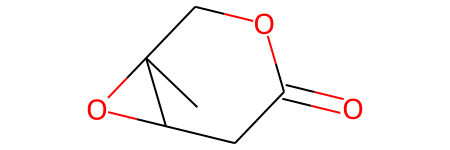

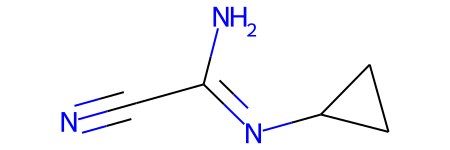

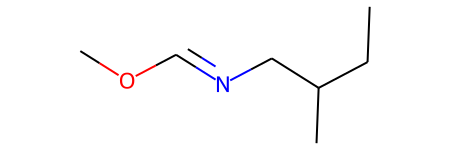

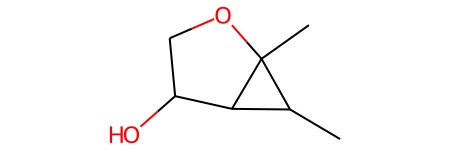

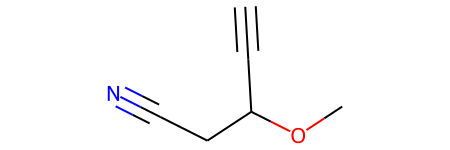

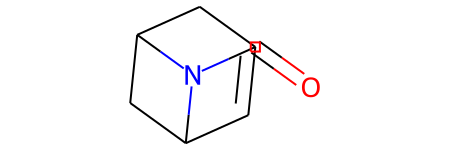

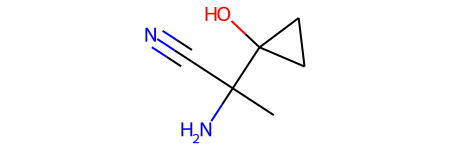

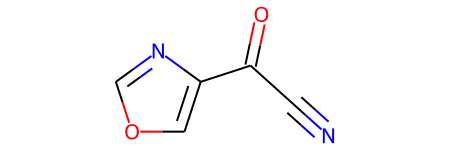

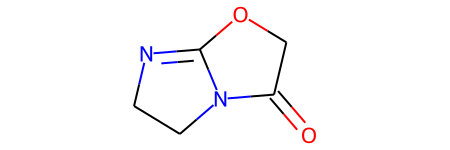

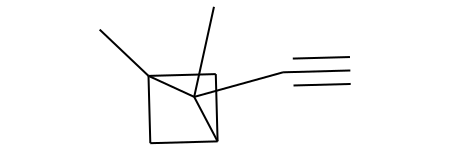

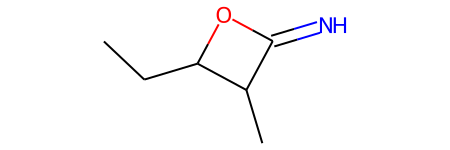

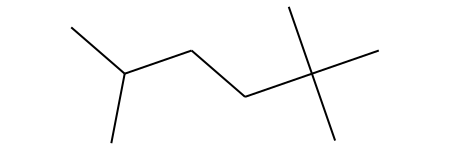

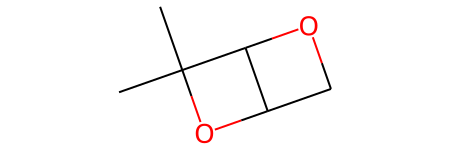

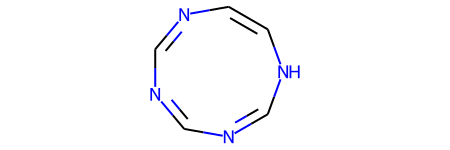

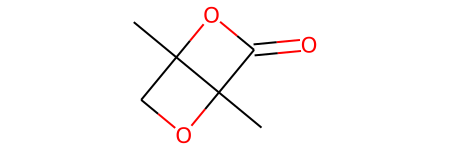

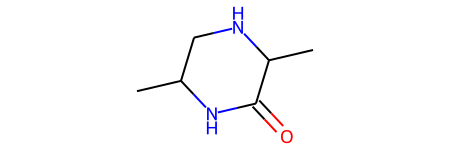

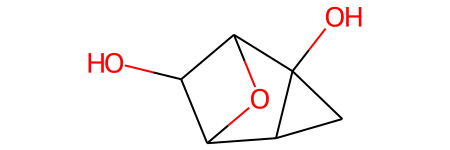

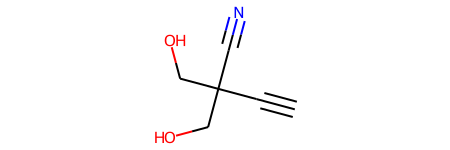

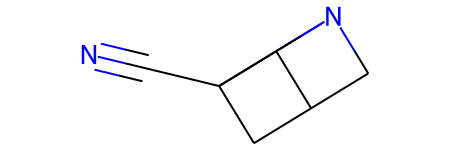

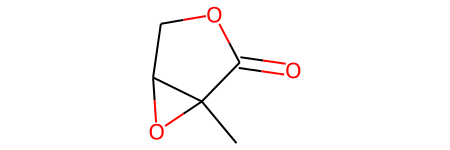

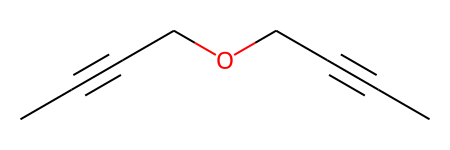

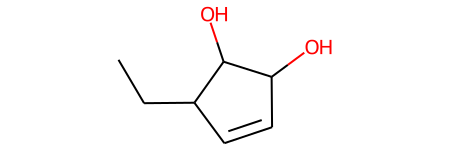

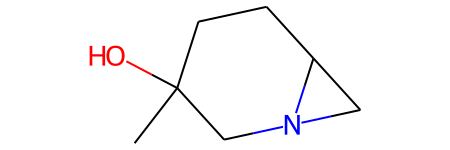

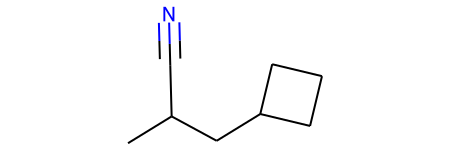

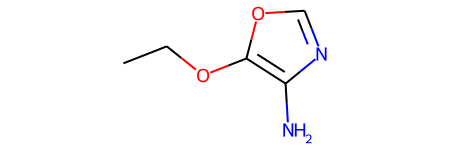

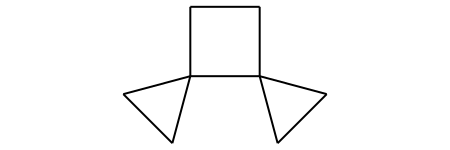

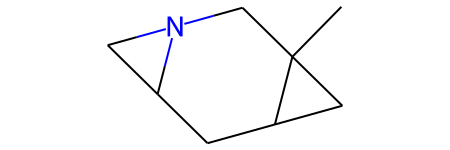

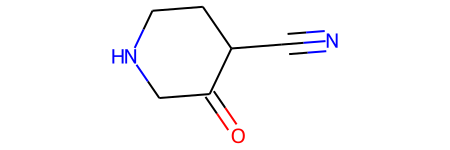

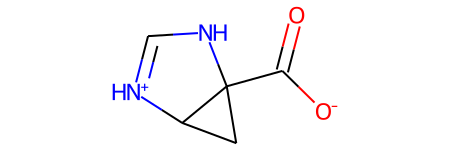

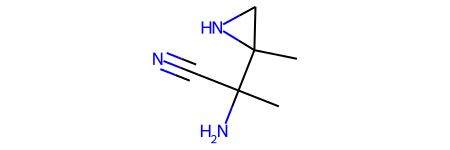

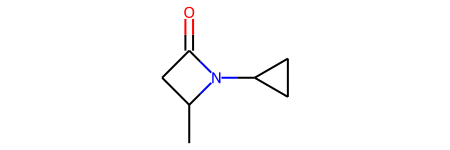

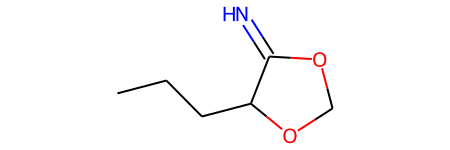

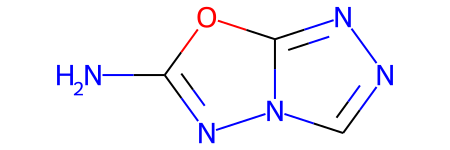

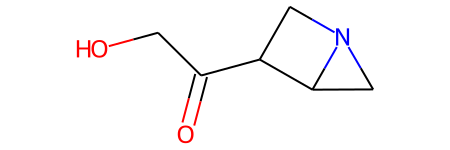

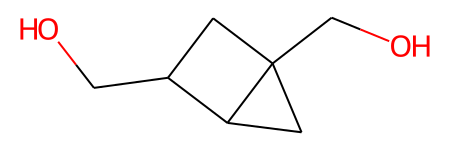

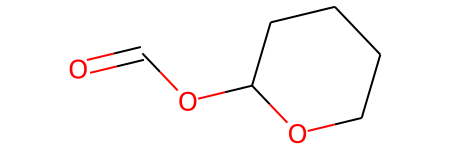

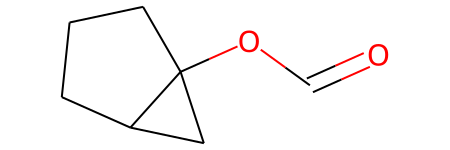

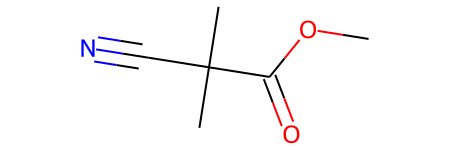

In [41]:

# Create mol object from smiles string
randomlist = random.sample(range(0, 133886), 200)
for smile in data['smiles'][randomlist]:
    mol = Chem.MolFromSmiles(smile)
    molSize=(450,150)
    mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
    #Compute 2D coordinates
      rdDepictor.Compute2DCoords(mc)
    # init the drawer with the size
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    #draw the molcule
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    # get the SVG string
    svg = drawer.GetDrawingText()
    # fix the svg string and display it
    display(SVG(svg.replace('svg:','')))

Since looping over each molecule is not computing efficient I have to optimise it by representing moleculeas as special rdkit.Chem objects of a corresponding C++ class

Creating rdkit object for each smile notation

In [42]:


#Method transforms smiles strings to mol rdkit object
data['mol'] = data['smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 

#Now let's see what we've got
print(type(data['mol'][0]))

<class 'rdkit.Chem.rdchem.Mol'>


In [43]:
data

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom,mol
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772,<rdkit.Chem.rdchem.Mol object at 0x0000027A02D...
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802,<rdkit.Chem.rdchem.Mol object at 0x0000027A02D...
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171,<rdkit.Chem.rdchem.Mol object at 0x0000027A02D...
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724,<rdkit.Chem.rdchem.Mol object at 0x0000027A02D...
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028,<rdkit.Chem.rdchem.Mol object at 0x0000027A02D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,gdb_133881,C1C2C3C4C5OC14C5N23,3.59483,2.198990,1.904230,1.6637,69.37,-0.2254,0.0588,0.2842,760.7472,0.127406,-400.633868,-400.628599,-400.627654,-400.663098,23.658,-1603.983913,-1614.898804,-1623.788097,-1492.819438,<rdkit.Chem.rdchem.Mol object at 0x0000027A0AB...
133881,gdb_133882,C1N2C3C2C2C4OC12C34,3.65648,2.142370,1.904390,1.2976,69.52,-0.2393,0.0608,0.3002,762.6354,0.127495,-400.629713,-400.624444,-400.623500,-400.658942,23.697,-1601.376613,-1612.291504,-1621.181424,-1490.211511,<rdkit.Chem.rdchem.Mol object at 0x0000027A0AB...
133882,gdb_133883,C1N2C3C4C5C2C13CN45,3.67118,2.143140,1.895010,1.2480,73.60,-0.2233,0.0720,0.2953,780.3553,0.140458,-380.753918,-380.748619,-380.747675,-380.783148,23.972,-1667.045429,-1678.830048,-1688.312964,-1549.143391,<rdkit.Chem.rdchem.Mol object at 0x0000027A0AB...
133883,gdb_133884,C1N2C3C4C5CC13C2C45,3.52845,2.151310,1.865820,1.9576,77.40,-0.2122,0.0881,0.3003,803.1904,0.152222,-364.720374,-364.714974,-364.714030,-364.749650,24.796,-1794.600439,-1807.210860,-1817.286772,-1670.349892,<rdkit.Chem.rdchem.Mol object at 0x0000027A0AB...


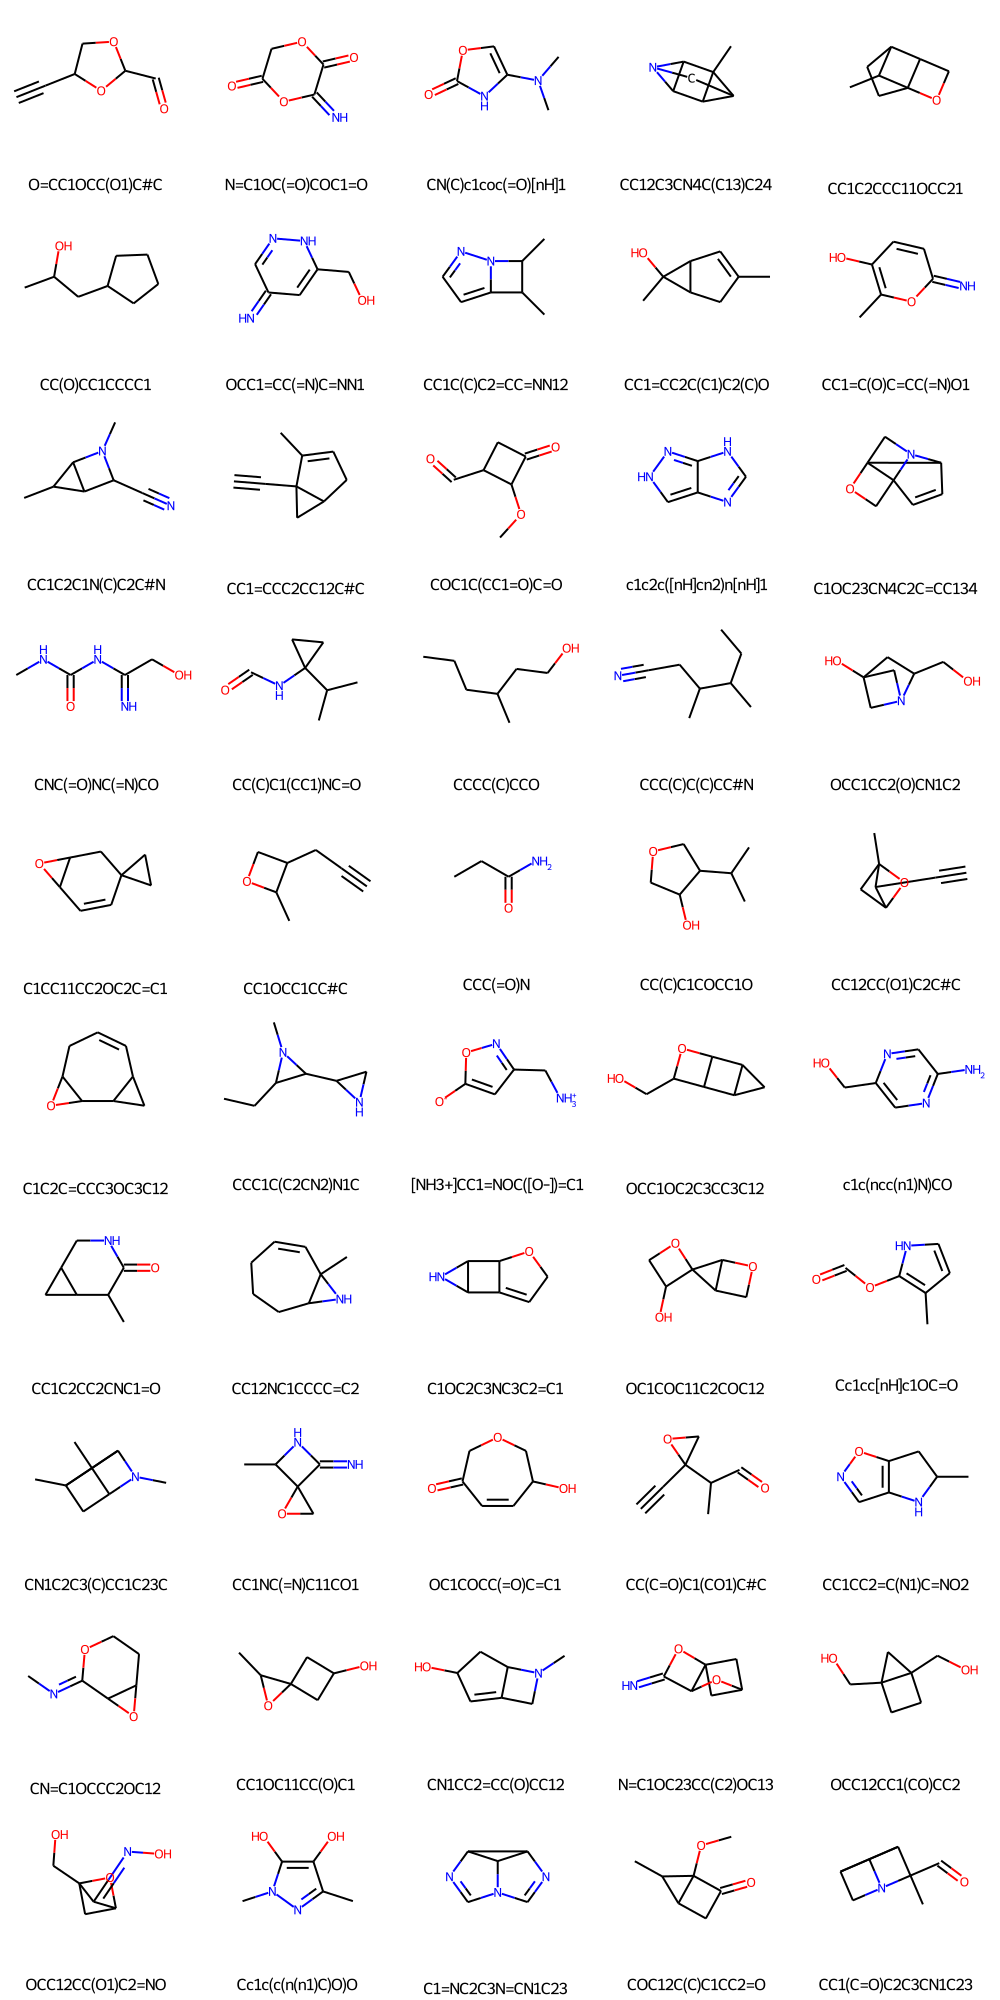

In [44]:

mols = data['mol'][randomlist]

#MolsToGridImage allows to paint a number of molecules at a time
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(data['smiles'][randomlist].values))

Analysing the type of atoms in our dataset

In [45]:
data['mol'] = data['mol'].apply(lambda x: Chem.AddHs(x))
data['num_of_atoms'] = data['mol'].apply(lambda x: x.GetNumAtoms())
data['num_of_heavy_atoms'] = data['mol'].apply(lambda x: x.GetNumHeavyAtoms())

In [46]:
data

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom,mol,num_of_atoms,num_of_heavy_atoms
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772,<rdkit.Chem.rdchem.Mol object at 0x0000027A0AB...,5,1
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802,<rdkit.Chem.rdchem.Mol object at 0x0000027A0AB...,4,1
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171,<rdkit.Chem.rdchem.Mol object at 0x0000027A0AB...,3,1
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724,<rdkit.Chem.rdchem.Mol object at 0x0000027A02D...,4,2
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028,<rdkit.Chem.rdchem.Mol object at 0x00000279028...,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,gdb_133881,C1C2C3C4C5OC14C5N23,3.59483,2.198990,1.904230,1.6637,69.37,-0.2254,0.0588,0.2842,760.7472,0.127406,-400.633868,-400.628599,-400.627654,-400.663098,23.658,-1603.983913,-1614.898804,-1623.788097,-1492.819438,<rdkit.Chem.rdchem.Mol object at 0x0000027A136...,16,9
133881,gdb_133882,C1N2C3C2C2C4OC12C34,3.65648,2.142370,1.904390,1.2976,69.52,-0.2393,0.0608,0.3002,762.6354,0.127495,-400.629713,-400.624444,-400.623500,-400.658942,23.697,-1601.376613,-1612.291504,-1621.181424,-1490.211511,<rdkit.Chem.rdchem.Mol object at 0x0000027A136...,16,9
133882,gdb_133883,C1N2C3C4C5C2C13CN45,3.67118,2.143140,1.895010,1.2480,73.60,-0.2233,0.0720,0.2953,780.3553,0.140458,-380.753918,-380.748619,-380.747675,-380.783148,23.972,-1667.045429,-1678.830048,-1688.312964,-1549.143391,<rdkit.Chem.rdchem.Mol object at 0x0000027A136...,17,9
133883,gdb_133884,C1N2C3C4C5CC13C2C45,3.52845,2.151310,1.865820,1.9576,77.40,-0.2122,0.0881,0.3003,803.1904,0.152222,-364.720374,-364.714974,-364.714030,-364.749650,24.796,-1794.600439,-1807.210860,-1817.286772,-1670.349892,<rdkit.Chem.rdchem.Mol object at 0x0000027A136...,18,9


In [47]:
strucutre_data=data.to_csv("structure_data.csv")

In [48]:
#We're going to settle the function that searches patterns and use it for a list of most common atoms only
def number_of_atoms(atom_list, data):
    for i in atom_list:
        data['num_of_{}_atoms'.format(i)] = data['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C','O', 'N'], data)

In [49]:
data

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom,mol,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772,<rdkit.Chem.rdchem.Mol object at 0x0000027A0AB...,5,1,1,0,0
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802,<rdkit.Chem.rdchem.Mol object at 0x0000027A0AB...,4,1,0,0,1
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171,<rdkit.Chem.rdchem.Mol object at 0x0000027A0AB...,3,1,0,1,0
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724,<rdkit.Chem.rdchem.Mol object at 0x0000027A02D...,4,2,2,0,0
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028,<rdkit.Chem.rdchem.Mol object at 0x00000279028...,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,gdb_133881,C1C2C3C4C5OC14C5N23,3.59483,2.198990,1.904230,1.6637,69.37,-0.2254,0.0588,0.2842,760.7472,0.127406,-400.633868,-400.628599,-400.627654,-400.663098,23.658,-1603.983913,-1614.898804,-1623.788097,-1492.819438,<rdkit.Chem.rdchem.Mol object at 0x0000027A136...,16,9,7,1,1
133881,gdb_133882,C1N2C3C2C2C4OC12C34,3.65648,2.142370,1.904390,1.2976,69.52,-0.2393,0.0608,0.3002,762.6354,0.127495,-400.629713,-400.624444,-400.623500,-400.658942,23.697,-1601.376613,-1612.291504,-1621.181424,-1490.211511,<rdkit.Chem.rdchem.Mol object at 0x0000027A136...,16,9,7,1,1
133882,gdb_133883,C1N2C3C4C5C2C13CN45,3.67118,2.143140,1.895010,1.2480,73.60,-0.2233,0.0720,0.2953,780.3553,0.140458,-380.753918,-380.748619,-380.747675,-380.783148,23.972,-1667.045429,-1678.830048,-1688.312964,-1549.143391,<rdkit.Chem.rdchem.Mol object at 0x0000027A136...,17,9,7,0,2
133883,gdb_133884,C1N2C3C4C5CC13C2C45,3.52845,2.151310,1.865820,1.9576,77.40,-0.2122,0.0881,0.3003,803.1904,0.152222,-364.720374,-364.714974,-364.714030,-364.749650,24.796,-1794.600439,-1807.210860,-1817.286772,-1670.349892,<rdkit.Chem.rdchem.Mol object at 0x0000027A136...,18,9,8,0,1


In [50]:
#rdkit.Chem.Descriptors.TPSA() - the surface sum over all polar atoms or molecules also including their attached hydrogen atoms;
#rdkit.Chem.Descriptors.ExactMolWt() - exact molecural weight;
#rdkit.Chem.Descriptors.NumValenceElectrons() - number of valence electrons (may illustrate general electronic density)
#rdkit.Chem.Descriptors.NumHeteroatoms() - general number of non-carbon atoms.


In [51]:
from rdkit.Chem import Descriptors
data['tpsa'] = data['mol'].apply(lambda x: Descriptors.TPSA(x))
data['mol_w'] = data['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
data['num_valence_electrons'] = data['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
data['num_heteroatoms'] = data['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))

In [52]:
data

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom,mol,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,tpsa,mol_w,num_valence_electrons,num_heteroatoms
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772,<rdkit.Chem.rdchem.Mol object at 0x0000027A0AB...,5,1,1,0,0,0.00,16.031300,8,0
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802,<rdkit.Chem.rdchem.Mol object at 0x0000027A0AB...,4,1,0,0,1,35.00,17.026549,8,1
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171,<rdkit.Chem.rdchem.Mol object at 0x0000027A0AB...,3,1,0,1,0,31.50,18.010565,8,1
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724,<rdkit.Chem.rdchem.Mol object at 0x0000027A02D...,4,2,2,0,0,0.00,26.015650,10,0
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028,<rdkit.Chem.rdchem.Mol object at 0x00000279028...,3,2,1,0,1,23.79,27.010899,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,gdb_133881,C1C2C3C4C5OC14C5N23,3.59483,2.198990,1.904230,1.6637,69.37,-0.2254,0.0588,0.2842,760.7472,0.127406,-400.633868,-400.628599,-400.627654,-400.663098,23.658,-1603.983913,-1614.898804,-1623.788097,-1492.819438,<rdkit.Chem.rdchem.Mol object at 0x0000027A136...,16,9,7,1,1,12.24,121.052764,46,2
133881,gdb_133882,C1N2C3C2C2C4OC12C34,3.65648,2.142370,1.904390,1.2976,69.52,-0.2393,0.0608,0.3002,762.6354,0.127495,-400.629713,-400.624444,-400.623500,-400.658942,23.697,-1601.376613,-1612.291504,-1621.181424,-1490.211511,<rdkit.Chem.rdchem.Mol object at 0x0000027A136...,16,9,7,1,1,12.24,121.052764,46,2
133882,gdb_133883,C1N2C3C4C5C2C13CN45,3.67118,2.143140,1.895010,1.2480,73.60,-0.2233,0.0720,0.2953,780.3553,0.140458,-380.753918,-380.748619,-380.747675,-380.783148,23.972,-1667.045429,-1678.830048,-1688.312964,-1549.143391,<rdkit.Chem.rdchem.Mol object at 0x0000027A136...,17,9,7,0,2,6.25,120.068748,46,2
133883,gdb_133884,C1N2C3C4C5CC13C2C45,3.52845,2.151310,1.865820,1.9576,77.40,-0.2122,0.0881,0.3003,803.1904,0.152222,-364.720374,-364.714974,-364.714030,-364.749650,24.796,-1794.600439,-1807.210860,-1817.286772,-1670.349892,<rdkit.Chem.rdchem.Mol object at 0x0000027A136...,18,9,8,0,1,3.24,119.073499,46,1


implementing mol2vec

In [53]:
mdf=pd.read_csv('E:\Downlaods-2\qm9.csv')['smiles']

In [54]:
mdf

0                           C
1                           N
2                           O
3                         C#C
4                         C#N
                 ...         
133880    C1C2C3C4C5OC14C5N23
133881    C1N2C3C2C2C4OC12C34
133882    C1N2C3C4C5C2C13CN45
133883    C1N2C3C4C5CC13C2C45
133884    C1N2C3C4C5OC13C2C45
Name: smiles, Length: 133885, dtype: object

In [55]:
#Transforming SMILES to MOL
mdf['mol'] = mdf.apply(lambda x: Chem.MolFromSmiles(x))

In [56]:
#Loading pre-trained model via word2vec
from gensim.models import word2vec
model = word2vec.Word2Vec.load('E:\Downlaods-2\model_300dim.pkl')

In [57]:
#from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
#from gensim.models import word2vec
#print('Molecular sentence:', mol2alt_sentence(mdf['mol'][1], radius=1))
#print('\nMolSentence object:', MolSentence(mol2alt_sentence(mdf['mol'][1], radius=1)))
#print('\nDfVec object:',DfVec(sentences2vec(MolSentence(mol2alt_sentence(mdf['mol'][1], radius=1)), model, unseen='UNK')))

In [58]:
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from mol2vec.helpers import depict_identifier, plot_2D_vectors, IdentifierTable, mol_to_svg
import mol2vec

# Basic Modelling

In [122]:
X=data.iloc[:,22:]
X

,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,tpsa,mol_w,num_valence_electrons,num_heteroatoms
0,5,1,1,0,0,0.00,16.031300,8,0
1,4,1,0,0,1,35.00,17.026549,8,1
2,3,1,0,1,0,31.50,18.010565,8,1
3,4,2,2,0,0,0.00,26.015650,10,0
4,3,2,1,0,1,23.79,27.010899,10,1
...,...,...,...,...,...,...,...,...,...
133880,16,9,7,1,1,12.24,121.052764,46,2
133881,16,9,7,1,1,12.24,121.052764,46,2
133882,17,9,7,0,2,6.25,120.068748,46,2
133883,18,9,8,0,1,3.24,119.073499,46,1


In [123]:
y=data['h298_atom']
y

0         -401.014647
1         -280.399259
2         -215.159658
3         -389.016047
4         -304.091489
             ...     
133880   -1623.788097
133881   -1621.181424
133882   -1688.312964
133883   -1817.286772
133884   -1623.345075
Name: h298_atom, Length: 133885, dtype: float64

## Linear regression

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#splitting the dataset as training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

#building the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

#Accuracy
print("R-Squared Value for Training Set: {:.3f}".format(linreg.score(X_train, y_train)))
print("R-Squared Value for Test Set: {:.3f}".format(linreg.score(X_test, y_test)))

R-Squared Value for Training Set: 0.990
R-Squared Value for Test Set: 0.990


In [125]:
X_train.shape

(100413, 9)

In [126]:
X_test.shape

(33472, 9)

## KNN regression

In [127]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 2)
knnreg.fit(X_train, y_train)

print('R-squared train score: {:.3f}'.format(knnreg.score(X_train, y_train)))
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test, y_test)))

R-squared train score: 0.994
R-squared test score: 0.993


## Ridge Regression

In [128]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

print('R-squared score (training): {:.3f}'.format(ridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(ridge.score(X_test, y_test)))

R-squared score (training): 0.990
R-squared score (test): 0.990


## LASSO Regression

In [129]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 10000)
lasso.fit(X_train, y_train)

print('R-squared score (training): {:.3f}'.format(lasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lasso.score(X_test, y_test)))

R-squared score (training): 0.989
R-squared score (test): 0.989


In [67]:
y_test_preds=ridge.predict(X_test)

In [68]:
y_test_preds

array([-1705.24204098, -1936.8209823 , -1526.32726902, ...,
       -1104.83113452, -1912.15908994, -1765.76198897])

In [69]:
y_test

26851    -1729.628785
93356    -1962.765321
5296     -1585.385173
78779    -2214.227002
129600   -1430.512187
             ...     
92587    -2011.679020
129032   -1478.243032
21636    -1088.876207
41699    -1943.640102
18980    -1752.608164
Name: h298_atom, Length: 33472, dtype: float64

Text(0, 0.5, 'Actual Values')

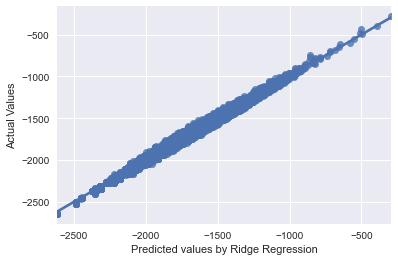

In [70]:

ax = sns.regplot(x=y_test_preds, y=y_test)
ax.set_xlabel('Predicted values by Ridge Regression')
ax.set_ylabel('Actual Values')



# using sorted coulomb matrices

Generating coulomb matrices from each smile

the problem with coulmb matrices is that though they are invariant for translations and rotations but since the order of atoms is not defined many permutations can be formed for the same molecule.

To deal this we come up with three methods eigenspectrum representation, sorted coulomb matrices( norm-2 either across columns or rows) and the third is randomly sorted coulomb matrices

In [71]:
from openbabel import pybel

ModuleNotFoundError: No module named 'openbabel'

In [ ]:
mols = [pybel.readstring("smi", molecule)  for rows in data['smiles']]
temp=[mol.OBMol.AddHydrogens() for mol in mols]

# one hot encoding

In [75]:
smiles=data['smiles']


In [76]:
smiles

0                           C
1                           N
2                           O
3                         C#C
4                         C#N
                 ...         
133880    C1C2C3C4C5OC14C5N23
133881    C1N2C3C2C2C4OC12C34
133882    C1N2C3C4C5C2C13CN45
133883    C1N2C3C4C5CC13C2C45
133884    C1N2C3C4C5OC13C2C45
Name: smiles, Length: 133885, dtype: object

In [77]:
one_hot=[]
unique=set()
for smile in smiles:
    one_h=list(smile)
   
    one_hot.append(one_h)
one_hot=pd.DataFrame(one_hot)
one_hot.replace([None],['pad'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,C,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad
1,N,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad
2,O,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad
3,C,#,C,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad
4,C,#,N,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,C,1,C,2,C,3,C,4,C,5,O,C,1,4,C,5,N,2,3,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad
133881,C,1,N,2,C,3,C,2,C,2,C,4,O,C,1,2,C,3,4,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad
133882,C,1,N,2,C,3,C,4,C,5,C,2,C,1,3,C,N,4,5,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad
133883,C,1,N,2,C,3,C,4,C,5,C,C,1,3,C,2,C,4,5,pad,pad,pad,pad,pad,pad,pad,pad,pad,pad


In [78]:
one_hot=pd.get_dummies(one_hot)

In [79]:
one_hot

,0_C,0_F,0_N,0_O,0_[,0_c,0_n,1_#,1_(,1_1,1_=,1_C,1_N,1_O,1_[,1_c,1_n,2_#,2_(,2_-,2_1,2_2,2_=,2_C,2_F,2_H,2_N,2_O,2_[,2_c,2_n,3_#,3_(,3_),3_-,3_1,3_2,3_3,3_=,3_C,3_F,3_H,3_N,3_O,3_[,3_],3_c,3_n,3_o,4_#,4_(,4_),4_+,4_-,4_1,4_2,4_3,4_=,4_C,4_F,4_H,4_N,4_O,4_[,4_],4_c,4_n,4_o,5_#,5_(,5_),5_+,5_-,5_1,5_2,5_3,5_=,5_C,5_F,5_H,5_N,5_O,5_[,5_],5_c,5_n,5_o,6_#,6_(,6_),6_+,6_-,6_1,6_2,6_3,6_4,6_=,6_C,6_F,6_H,6_N,6_O,6_[,6_],6_c,6_n,6_o,7_#,7_(,7_),7_+,7_-,7_1,7_2,7_3,7_4,7_=,7_C,7_F,7_H,7_N,7_O,7_[,7_],7_c,7_n,7_o,8_#,8_(,8_),8_+,8_-,8_1,8_2,8_3,8_4,8_5,8_=,8_C,8_F,8_H,8_N,8_O,8_[,8_],8_c,8_n,8_o,9_#,9_(,9_),9_+,9_-,9_1,9_2,9_3,9_4,9_5,9_=,9_C,9_F,9_H,9_N,9_O,9_[,9_],9_c,9_n,9_o,10_#,10_(,10_),10_+,10_-,10_1,10_2,10_3,10_4,10_5,10_=,10_C,10_F,10_H,10_N,10_O,10_[,10_],10_c,10_n,10_o,11_#,11_(,11_),11_+,11_-,11_1,11_2,11_3,11_4,11_5,11_=,11_C,11_F,11_H,11_N,11_O,11_[,11_],11_c,11_n,11_o,12_#,12_(,12_),12_+,12_-,12_1,12_2,12_3,12_4,12_5,12_=,12_C,12_F,12_H,12_N,12_O,12_[,12_],12_c,12_n,12_o,13_#,13_(,13_),13_+,13_-,13_1,13_2,13_3,13_4,13_5,13_=,13_C,13_F,13_H,13_N,13_O,13_[,13_],13_c,13_n,13_o,14_#,14_(,14_),14_+,14_-,14_1,14_2,14_3,14_4,14_5,14_=,14_C,14_F,14_H,14_N,14_O,14_[,14_],14_c,14_n,14_o,15_#,15_(,15_),15_+,15_-,15_1,15_2,15_3,15_4,15_5,15_=,15_C,15_F,15_H,15_N,15_O,15_[,15_],15_c,15_n,15_o,16_#,16_(,16_),16_+,16_-,16_1,16_2,16_3,16_4,16_5,16_=,16_C,16_F,16_H,16_N,16_O,16_[,16_],16_c,16_n,16_o,17_#,17_(,17_),17_+,17_-,17_1,17_2,17_3,17_4,17_=,17_C,17_F,17_H,17_N,17_O,17_[,17_],17_c,17_n,17_o,18_#,18_(,18_),18_+,18_-,18_1,18_2,18_3,18_4,18_5,18_=,18_C,18_F,18_H,18_N,18_O,18_[,18_],18_c,18_n,18_o,19_#,19_(,19_),19_+,19_-,19_1,19_2,19_3,19_4,19_=,19_C,19_F,19_H,19_N,19_O,19_[,19_],19_c,19_n,19_o,20_#,20_(,20_),20_+,20_-,20_1,20_2,20_3,20_4,20_5,20_=,20_C,20_F,20_H,20_N,20_O,20_[,20_],20_c,20_n,20_o,21_#,21_(,21_),21_+,21_-,21_1,21_2,21_3,21_4,21_5,21_=,21_C,21_F,21_H,21_N,21_O,21_[,21_],21_n,21_o,22_#,22_),22_+,22_-,22_1,22_2,22_=,22_C,22_F,22_H,22_N,22_O,22_[,22_],22_n,22_o,23_#,23_),23_+,23_-,23_1,23_2,23_3,23_=,23_C,23_F,23_H,23_N,23_O,23_],23_n,24_#,24_),24_+,24_-,24_1,24_2,24_=,24_C,24_F,24_H,24_N,24_O,24_[,24_],25_),25_1,25_2,25_3,25_=,25_C,25_N,25_O,25_],25_n,26_1,26_2,26_=,26_H,26_O,27_3,27_O,27_],28_1
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
X=one_hot
y=data['h298_atom']


### Splitting the dataset

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA- to reduce dimensionality

In [84]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

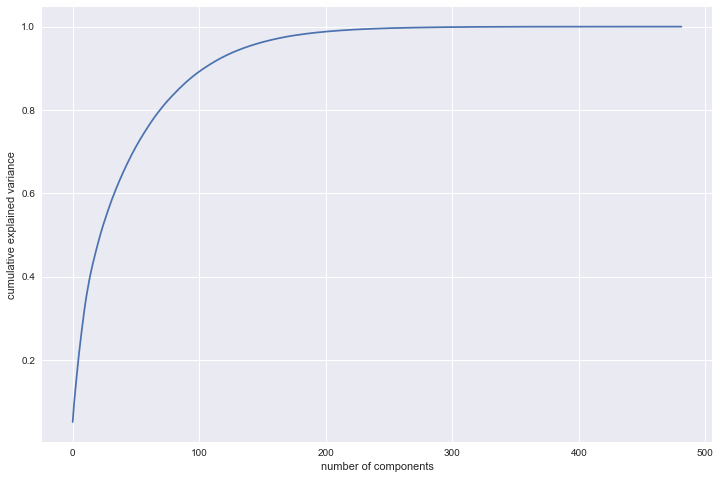

In [85]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

As we can see approximately after 200 features there is not much increament in explained variance thus we can say that the rest of the features are redundant.

In [86]:
np.cumsum(pca.explained_variance_ratio_)

array([0.0506476 , 0.09161758, 0.12428536, 0.15601903, 0.18655087,
       0.21527249, 0.24158759, 0.26649817, 0.29062334, 0.31443864,
       0.33608392, 0.35525733, 0.3726123 , 0.38954524, 0.40486586,
       0.41878706, 0.43197319, 0.44442663, 0.45663254, 0.46852894,
       0.47993737, 0.49112013, 0.50227172, 0.51267576, 0.52260098,
       0.53199726, 0.54125448, 0.55038197, 0.5593284 , 0.56809918,
       0.57663012, 0.58497188, 0.59296547, 0.60083904, 0.60853359,
       0.61596791, 0.62321561, 0.6304344 , 0.63751799, 0.64431886,
       0.65105305, 0.65770455, 0.66411402, 0.67049779, 0.67666049,
       0.68277684, 0.68886877, 0.69479688, 0.70057068, 0.70628851,
       0.71176172, 0.71717189, 0.72248884, 0.72771173, 0.73282352,
       0.73790446, 0.74280496, 0.74764315, 0.75242489, 0.75715479,
       0.76186568, 0.76642685, 0.77093366, 0.77537074, 0.77972381,
       0.78401105, 0.78812014, 0.79210974, 0.79605092, 0.79996597,
       0.80378301, 0.80757196, 0.81131182, 0.81494628, 0.81848

In [87]:
pca = PCA(n_components=200)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [88]:
X_train.shape

(107108, 200)

# ANN Model

In [89]:
import tensorflow as tf
from tensorflow import keras
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Cloning https://github.com/tensorflow/docs to c:\users\nikhi\appdata\local\temp\pip-req-build-1rx0y768


  Running command git clone -q https://github.com/tensorflow/docs 'C:\Users\nikhi\AppData\Local\Temp\pip-req-build-1rx0y768'


In [90]:
from keras import backend as K

In [91]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64,activation='relu'),
    
    keras.layers.Dense(1)])

optimizer = tf.keras.optimizers.Adam(0.01)
def R2_coeff(y_true, y_pred):
    u = K.sum(K.square(y_true - y_pred))
    v = K.sum(K.square(y_true - K.mean(y_true)))
    return K.ones_like(v) - (u / v)
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=[R2_coeff])
#R_2 coeff is used so that model can be compared to performance of linear regression model

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               51456     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 92,673
Trainable params: 92,673
Non-trainable params: 0
__________________________________________________

In [93]:
EPOCHS = 300

history = model.fit(
  X_train, y_train,batch_size=64,
  epochs=EPOCHS, validation_split = 0.1, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, R2_coeff:0.1082,  loss:50008.3555,  val_R2_coeff:0.7812,  val_loss:12071.2969,  
....................................................................................................
Epoch: 100, R2_coeff:0.9860,  loss:801.5566,  val_R2_coeff:0.9827,  val_loss:972.6094,  
....................................................................................................
Epoch: 200, R2_coeff:0.9881,  loss:686.8531,  val_R2_coeff:0.9654,  val_loss:1933.7147,  
....................................................................................................

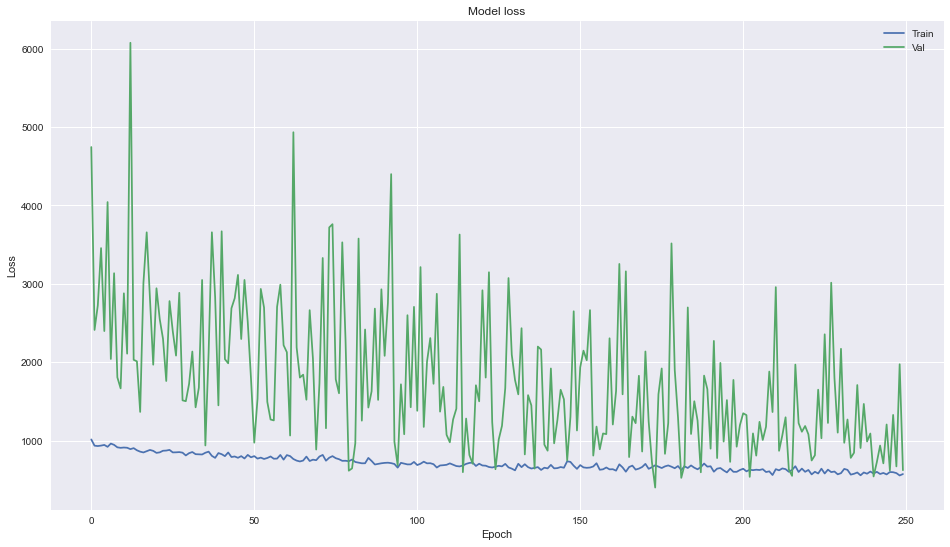

In [94]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'][50:])
plt.plot(history.history['val_loss'][50:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [96]:
from keras.layers import Flatten

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [95]:
tf.config.run_functions_eagerly(True)

# CNN based modelling

In [108]:
model_cnn = Sequential()

model_cnn.add(Conv1D(filters=4, kernel_size=8, activation='relu', input_shape=[X_train.shape[1],1]))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(10, activation='relu'))
model_cnn.add(Dense(1))


In [109]:
model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 193, 4)            36        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 96, 4)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3850      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 3,897
Trainable params: 3,897
Non-trainable params: 0
_________________________________________________________________


In [110]:
model_cnn.compile(loss='mse',
                optimizer=optimizer,
                metrics=[R2_coeff])

In [113]:
EPOCHS = 300

history = model_cnn.fit(
  X_train, y_train,batch_size=512,
  epochs=EPOCHS, validation_split = 0.1, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, R2_coeff:-3.0920,  loss:240732.8594,  val_R2_coeff:-0.1413,  val_loss:66347.0703,  
....................................................................................................
Epoch: 100, R2_coeff:0.9315,  loss:4027.4502,  val_R2_coeff:0.9274,  val_loss:4200.6504,  
....................................................................................................
Epoch: 200, R2_coeff:0.9453,  loss:3222.7659,  val_R2_coeff:0.9436,  val_loss:3268.4363,  
....................................................................................................

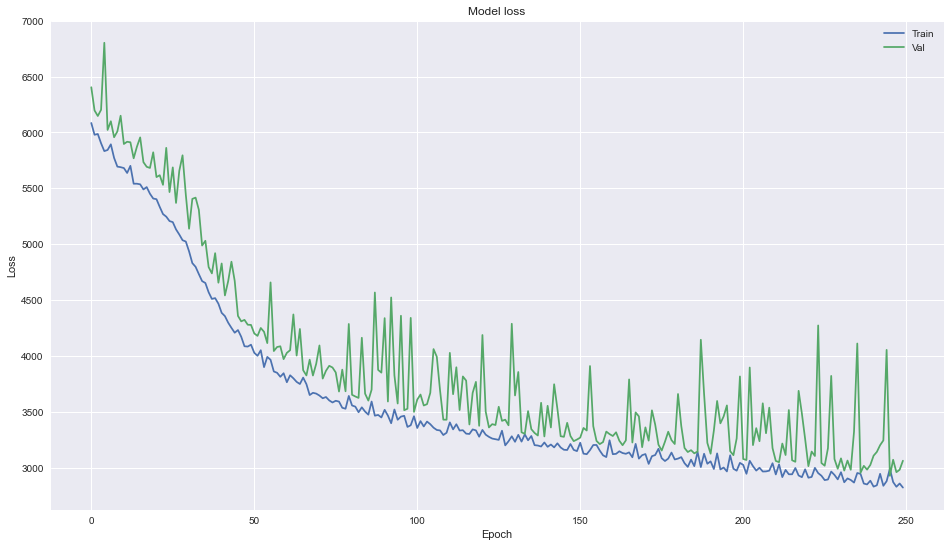

In [114]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'][50:])
plt.plot(history.history['val_loss'][50:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

CNN based modelling seems to work better, lets try to predict homo-lumo gap now 

In [70]:
gap=data['gap']
X_train, X_test, y_train, y_test = train_test_split(X, gap, test_size=0.2, random_state=42)
pca = PCA(n_components=200)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [112]:
X_train=X_train.reshape(107108, 200,1)

In [85]:
model_cnn = Sequential()

model_cnn.add(Conv1D(filters=4, kernel_size=8, activation='relu', input_shape=[X_train.shape[1],1]))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(10, activation='relu'))
model_cnn.add(Dense(1, activation='relu'))


In [86]:
model_cnn.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 193, 4)            36        
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 96, 4)             0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 384)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                3850      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 3,897
Trainable params: 3,897
Non-trainable params: 0
_________________________________________________________________


In [87]:
model_cnn.compile(loss='mse',
                optimizer=optimizer,
                metrics=[R2_coeff])

In [88]:
EPOCHS = 300

history = model_cnn.fit(
  X_train, y_train,batch_size=512,
  epochs=EPOCHS, validation_split = 0.1, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, R2_coeff:-28.0738,  loss:0.0652,  val_R2_coeff:-28.2277,  val_loss:0.0654,  
....................................................................................................
Epoch: 100, R2_coeff:-28.1079,  loss:0.0653,  val_R2_coeff:-28.2277,  val_loss:0.0654,  
....................................................................................................
Epoch: 200, R2_coeff:-28.0852,  loss:0.0653,  val_R2_coeff:-28.2277,  val_loss:0.0654,  
....................................................................................................

In [115]:
import pickle

In [117]:
#save the model to disk
filename = 'cnn_mol_predictor.sav'
pickle.dump(model_cnn, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

TypeError: cannot pickle 'weakref' object